In [23]:
import pathlib 

In [285]:

BASE_DIR = pathlib.Path().resolve().parent #Check: /Users/kristoffervarslott/Documents/Python.py/AI_API'
NUM_REC_DIR = pathlib.Path().resolve()     #Check: /Users/kristoffervarslott/Documents/Python.py/AI_API/NUM_REC'

DATASETS_DIR = BASE_DIR / 'Datasets'

DATASETS_NUM_REC = DATASETS_DIR / 'Datasets_NUM_REC'
DATASETS_NUM_REC.mkdir(exist_ok = True, parents = True)



ZIPS_DIR = DATASETS_NUM_REC / 'Zips'     #Check: /Users/kristoffervarslott/Documents/Python.py/AI_API/Datasets_Num_Rec/Zips
ZIPS_DIR.mkdir(exist_ok = True, parents = True)

NUM_REC_TRAIN_IMAGE_ZIP_PATH = ZIPS_DIR  / 'num-rec-train-image-dataset.gz'
NUM_REC_TRAIN_LABELS_ZIP_PATH = ZIPS_DIR / 'num-rec-train-labels-dataset.gz'

NUM_REC_TEST_IMAGEE_ZIP_PATH = ZIPS_DIR  / 'num-rec-test-image-dataset.gz'
NUM_REC_TEST_LABELS_ZIP_PATH = ZIPS_DIR  / 'num-rec-test-labels-dataset.gz'



EXPORT_DIR = DATASETS_NUM_REC / 'Exports'     #Check: /Users/kristoffervarslott/Documents/Python.py/AI_API/Datasets_Num_Rec/Zips
EXPORT_DIR.mkdir(exist_ok = True, parents = True)

NUM_CLASSIFIER_DIR = DATASETS_NUM_REC / 'NUM_REC_Classifier'     #Check: /Users/kristoffervarslott/Documents/Python.py/AI_API/Datasets_Num_Rec/Zips
NUM_CLASSIFIER_DIR.mkdir(exist_ok = True, parents = True)

In [128]:

#URL of dataset for number recognition from images. 
NUM_REC_TRAIN_IMAGE_ZIP = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
NUM_REC_TRAIN_LABEL_ZIP = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'

NUM_REC_TEST_IMAGE_ZIP = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
NUM_REC_TEST_LABEL_ZIP = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'


In [129]:

!curl $NUM_REC_TRAIN_IMAGE_ZIP -o $NUM_REC_TRAIN_IMAGE_ZIP_PATH
!curl $NUM_REC_TRAIN_LABEL_ZIP -o $NUM_REC_TRAIN_LABELS_ZIP_PATH

!curl $NUM_REC_TEST_IMAGE_ZIP -o $NUM_REC_TEST_IMAGEE_ZIP_PATH
!curl $NUM_REC_TEST_LABEL_ZIP -o $NUM_REC_TEST_LABELS_ZIP_PATH


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  12.8M      0 --:--:-- --:--:-- --:--:-- 12.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0   408k      0 --:--:-- --:--:-- --:--:--  408k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  3946k      0 --:--:-- --:--:-- --:--:-- 3946k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  58987      0 --:--:-- --:--:-- --:--:-- 58230


In [162]:

TRAIN_DATASETS_DIR = NUM_CLASSIFIER_DIR / 'Train_datasets'
TRAIN_DATASETS_DIR.mkdir(exist_ok = True, parents = True)

TEST_DATASETS_DIR = NUM_CLASSIFIER_DIR / 'Test_datasets'
TEST_DATASETS_DIR.mkdir(exist_ok = True, parents = True)

print(NUM_REC_TRAIN_IMAGE_ZIP_PATH)
print(TRAIN_DATASETS_DIR)

/Users/kristoffervarslott/Documents/Python.py/AI_API/Datasets/Datasets_NUM_REC/Zips/num-rec-train-image-dataset.gz
/Users/kristoffervarslott/Documents/Python.py/AI_API/Datasets/Datasets_NUM_REC/NUM_REC_Classifier/Train_datasets


In [133]:
!gunzip -f $NUM_REC_TRAIN_IMAGE_ZIP_PATH
!gunzip -f $NUM_REC_TRAIN_LABELS_ZIP_PATH
!gunzip -f $NUM_REC_TEST_IMAGEE_ZIP_PATH 
!gunzip -f $NUM_REC_TEST_LABELS_ZIP_PATH

!mv ~/Downloads/MyFile.txt ~/Documents/Work/NewFileName.txt

In [191]:
for file in ZIPS_DIR.resolve().iterdir():
    if not file.stem.startswith('.'):
        if 'train' in file.stem:
            Transfer_train = TRAIN_DATASETS_DIR/file.stem
            !cp $file $Transfer_train
        else:
            Transfer_test = TEST_DATASETS_DIR/file.stem
            !cp $file $Transfer_test

In [215]:
TRAIN_DATASETS_DIR
TEST_DATASETS_DIR

files_data = []
for path in TRAIN_DATASETS_DIR.parent.glob('*'): 
    for files in path.glob('*'):
        files_data.append(files)
print(files_data[0].stem)

num-rec-test-image-dataset


In [119]:
import tensorflow as tf
import pandas as pd

In [120]:
mnist = tf.keras.datasets.mnist
imdb  = tf.keras.datasets.imdb

In [265]:

#X_data separated as usually by train and test - approx 0.33 devided. X_data are images formed by matrices with
#values ranging from 0-255 grey-scale --> need to normalize for convinience 

#y_data are int values of images at same indeces. 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

1


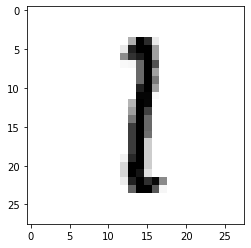

In [266]:
import matplotlib.pyplot as plt
random_idx = random.randint(0,len(X_train))

#Good overview over X_data and y_data 
plt.imshow(X_train[random_idx], cmap=plt.cm.binary) #Everything works fine. A matrix of number from 0-9
print(y_train[random_idx])

In [267]:
#Normalizing input values to range from 0-1 --> by dividing by max value of 255. 
X_train =X_train/255
X_test =X_test/255
#Be carefull --> If this cell is re-run without re-running upper cells, it will divide the current X_data on 255 again.

In [278]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [300]:
model.fit(X_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 2/6
1875/1875 [==============================] - 2s 965us/step - loss: 0.0136 - accuracy: 0.9956
Epoch 3/6
1875/1875 [==============================] - 2s 988us/step - loss: 0.0123 - accuracy: 0.9959
Epoch 4/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0117 - accuracy: 0.9960
Epoch 5/6
1875/1875 [==============================] - 2s 949us/step - loss: 0.0116 - accuracy: 0.9965
Epoch 6/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0102 - accuracy: 0.9967


In [301]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 719us/step - loss: 0.1101 - accuracy: 0.9810
0.11009103059768677 0.9810000061988831


In [302]:
#Model saved and stored to correct path.
MODEL_EXPORT_PATH = EXPORT_DIR / 'Num_Rec_Model.h5'
model.save(str(MODEL_EXPORT_PATH))

[[2.15257624e-17 3.42944503e-16 2.21365758e-17 ... 1.00000000e+00
  1.39545089e-15 7.07972439e-12]
 [2.17344963e-19 8.54601716e-16 1.00000000e+00 ... 8.42417693e-18
  1.44348579e-24 3.75487022e-33]
 [8.11211428e-12 9.99965668e-01 2.25015629e-06 ... 3.92760512e-07
  3.04444256e-05 2.77001005e-10]
 ...
 [7.84261895e-25 7.93022189e-18 7.72760948e-23 ... 7.71979542e-17
  1.79047979e-18 3.64284471e-11]
 [2.34537309e-21 3.61883491e-22 6.34731980e-25 ... 5.13423510e-19
  4.57753063e-12 7.37183120e-21]
 [1.59250311e-19 2.31920250e-25 1.20717636e-26 ... 8.07052592e-30
  2.24190119e-21 1.50044835e-18]]


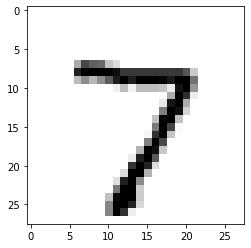

In [309]:
#Test model by running predictions: 
from tensorflow.keras.models import load_model
import numpy as np

cp_model = load_model(MODEL_EXPORT_PATH)
predictions = cp_model.predict([X_test])
print(predictions)
plt.imshow(X_test[0], cmap=plt.cm.binary) #Everything works fine. A matrix of number from 0-9

'2.6.0'